In [250]:
import os 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import h5py
import scipy
from tqdm import tqdm

In [2]:
folder = 'RN-8373_1698283056902'
files = [i for i in os.listdir(folder) if '.qxf' in i and '._' not in i]
files.sort()

In [36]:
cube = nc.Dataset('/Volumes/workDrive/SIO_Backup/Data/Models/SOHI/Annum/Amundsen.nc')
XC = np.asarray(cube['lon'])
YC = np.asarray(cube['lat'])
RC = np.asarray(cube['depth'])

grid = h5py.File('/Volumes/workDrive/SIO_Backup/Data/Models/SOHI/meta/GRID_v8.mat')
ix1 = np.argmin(abs(grid['XC'][0, :] - XC[0]%360))
ix2 = np.argmin(abs(grid['XC'][0, :] - XC[-1]%360))

iy1 = np.argmin(abs(grid['YC'][:, 0] - YC[0]))
iy2 = np.argmin(abs(grid['YC'][:, 0] - YC[-1]))

ICE = h5py.File('/Volumes/workDrive/SIO_Backup/Data/Models/SOHI/meta/ICEDRAFT_v8.mat')
ICE = ICE['Ice_Map'][iy1:iy2+1,ix1:ix2+1]
ICE[ICE!=0] = 1

BATH = -grid['Depth'][iy1:iy2+1, ix1:ix2+1] + ICE

/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_84588/1467508978.py:3: UserWarning: No contour levels were found within the data range.
  ax.contour(XC, YC, ICE, levels = [0,1])


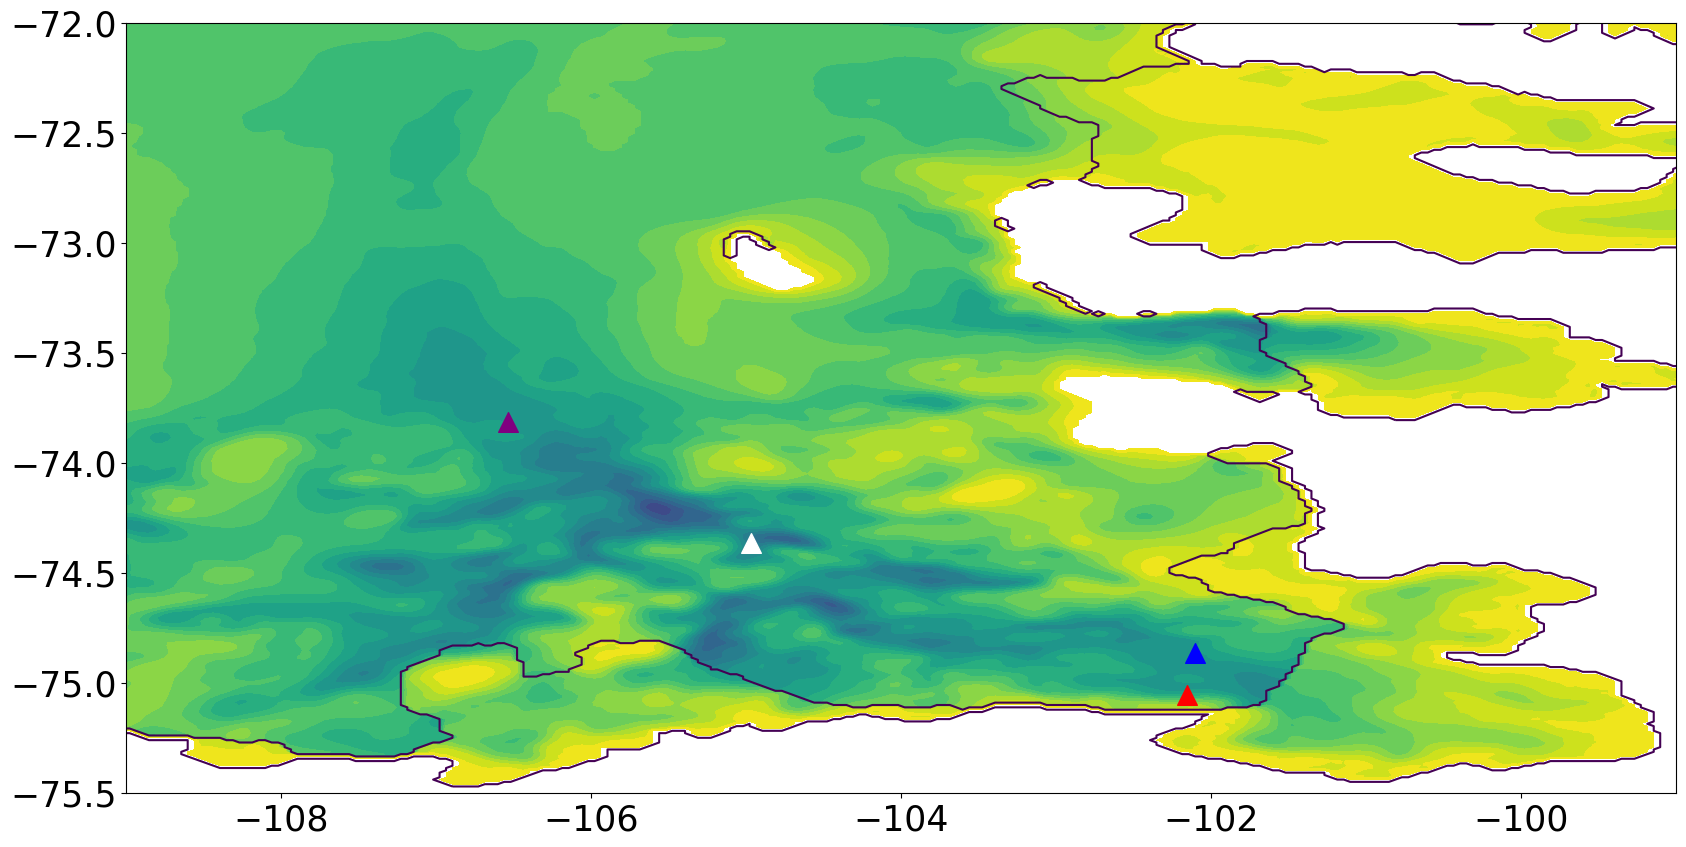

In [491]:
fig, ax = plt.subplots(figsize=(20,10))
ax.contourf(XC, YC, BATH, levels = np.arange(-2001, 0, 100))
ax.contour(XC, YC, ICE, levels = [0,1])

ax.scatter(-102.15437, -75.05528, marker='^', s=200, zorder=3, color='red') ## Good 2/24/12 - 2/12/14, D = 696.15 
ax.scatter(-102.10417, -74.86330, marker='^', s=200, zorder=3, color='blue') ## Good 2/23/12 - 2/12/14, D = 646
ax.scatter(-106.53533, -73.81265, marker='^', s=200, zorder=3, color='purple') ## Good 2/27/12 - 2/6/14, D = 732 
#ax.scatter(-104.96868, -74.36168 , marker='o', s=50, zorder=3, color='white') ##  DONT USE 2/23/12 - 12/31/12, D = 428-1020
ax.scatter(-104.96868, -74.36168 , marker='^', s=200, zorder=3, color='white') ## Good 1/1/13 - 12/31/13, D = 423 - 1015 ***
# ax.scatter(-104.96868, -74.36168 , marker='s', s=100, zorder=3, color='white') ## DONT USE 1/1/14 - 2/6/14, D = 422 - 1014
##### ax.scatter(-102.15437, -75.05528 , marker='s', s=100, zorder=3, color='red') ## 2/24/12 - 12/31/12
##### ax.scatter(-102.15437, -75.05528 , marker='s', s=100, zorder=3, color='red') ## 1/1/13 - 5/19/13
# ax.scatter(-104.96868, -74.36168  , marker='s', s=100, zorder=3, color='white') ## 2/23/12 - 12/31/12 D  = 393-400
# ax.scatter(-104.96868 , -74.36168   , marker='s', s=100, zorder=3, color='white') ## 1/1/13 - 2/6/13 D = 395 - 388 
##### ax.scatter(-102.10417 , -74.86330  , marker='s', s=100, zorder=3, color='blue') ## 2/22/12 - 2/31/12 
# ax.scatter(-102.10417 , -74.86330  , marker='s', s=100, zorder=3, color='blue') ## 1/1/2013 - 7/7/2013 D = 740 - 892
# ax.scatter(-102.07992 , -74.86720  , marker='s', s=100, zorder=3, color='blue') ## 2/18/14 - 12/31/14 D = 732 - 884
# ax.scatter(-102.07992 , -74.86720  , marker='s', s=100, zorder=3, color='blue') ## 1/1/15 - 12/1/15 MAYBE D = 732 - 884
# ax.scatter(-102.07992 , -74.86720  , marker='s', s=100, zorder=3, color='blue') ## 1/1/16 - 2/2/16 D = 732 - 884
# ax.scatter(-102.15242, -75.05887 , marker='o', s=100, zorder=3, color='red') ## 2/16/14 - 12/31/14 D = 150 - 302
# ax.scatter(-102.15242, -75.05887  , marker='o', s=100, zorder=3, color='red') ## 1/1/15 - 12/31/15 D = 204 - 356
# ax.scatter(-102.15242, -75.05887  , marker='o', s=100, zorder=3, color='red') ## 1/1/16 - 2/2/16 D = 256 - 408
# ax.scatter(-102.07992 , -74.86720  , marker='s', s=100, zorder=3, color='blue') ## 2/18/14 - 2/2/16 D = 648
# ax.scatter(-102.15242, -75.05887 , marker='o', s=100, zorder=3, color='red') ## 2/16/14 - 2/2/16 D = 663
ax.tick_params(axis='both', labelsize=25)

ax.set_xlim(-109, -99)
ax.set_ylim(-75.5, -72)

plt.savefig('img/map.png', dpi=300)

In [207]:
data = nc.Dataset(f"{folder}/{files[0]}")
try:
    print(data['LCSAZZ01'].shape)
except:
    print(data['LCNSAP01'].shape)

    for i in range(data['LCNSAP01'].shape[1]):
        print(data['DBINAA01'][0, i])

(103594,)


In [674]:
data = nc.Dataset(f"{folder}/{files[0]}")
E1 = np.asarray(data['LCEWZZ01'][:])
N1 = np.asarray(data['LCNSZZ01'][:])

d = data['AADYAA01'][0]

v1 = []
vel = []
for t in range(len(E1)):
    if data['AADYAA01'][t] == d:
        vel.append(np.sqrt(E1[t]**2 + N1[t]**2)) 
    else:
        d = data['AADYAA01'][t] ## update d
        v1.append(np.nanmean(vel))
        vel = []

In [680]:
data = nc.Dataset(f"{folder}/{files[1]}")
E2 = np.asarray(data['LCEWZZ01'][:])
N2 = np.asarray(data['LCNSZZ01'][:])

d = data['AADYAA01'][0]

v2 = []
vel = []
for t in range(len(E2)):
    if data['AADYAA01'][t] == d:
        vel.append(np.sqrt(E2[t]**2 + N2[t]**2)) 
    else:
        d = data['AADYAA01'][t] ## update d
        v2.append(np.nanmean(vel))
        vel = []

In [681]:
data = nc.Dataset(f"{folder}/{files[2]}")
E3 = np.asarray(data['LCEWZZ01'][:])
N3 = np.asarray(data['LCNSZZ01'][:])

d = data['AADYAA01'][0]

v3 = []
vel = []
for t in range(len(E3)):
    if data['AADYAA01'][t] == d:
        vel.append(np.sqrt(E3[t]**2 + N3[t]**2)) 
    else:
        d = data['AADYAA01'][t] ## update d
        v3.append(np.nanmean(vel))
        vel = []

### Plot 1: Compare water column

In [645]:
data = nc.Dataset(f"{folder}/{files[4]}")

depths = np.asarray(np.mean(data['DBINAA01'][:], axis=0))
# E4 = data['LCNSAP01'][:, 13]
# N4 = data['LCNSAP01'][:, 13]
# v4 = np.sqrt(E4**2 + N4**2)

In [316]:
zindex = [89, 93, 96, 99, 102, 105, 108, 110]
for z in zindex:
    print(RC[z])

-454.51334
-507.5112
-550.8399
-597.50024
-647.7482
-701.8599
-760.1322
-801.4489


In [314]:
tz = [2, 5, 8, 11, 14, 17, 21, 24]
for z in tz:
    print(depths[z])

454.1804
502.1806
550.1813
598.18085
646.18066
694.18115
758.1809
806.18146


In [708]:
### Get SOhi
iy = np.argmin(abs(-75.05528 - YC))
ix = np.argmin(abs(-102.15437 - XC))

nt = int(len(cube['date'])/4)

SOhi_vel = [np.zeros(nt) for i in range(25)]

count = 0
for t in tqdm(range(0,nt*4,4)):
    for z in range(89, 114):
        u = np.asarray(cube['UVEL'][t:t+4, z, iy-1:iy+2, ix-1:ix+2])
        v = np.asarray(cube['VVEL'][t:t+4, z, iy-1:iy+2, ix-1:ix+2])
        Vel = np.sqrt(u**2 + v**2) 
        SOhi_vel[z-89][count] = np.nanmax(Vel)
    count += 1
        
SOhi_mean = [np.mean(i) for i in SOhi_vel]
SOhi_std = [np.std(i) for i in SOhi_vel]

  0%|                                                   | 0/365 [00:00<?, ?it/s]/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_84588/484169954.py:15: RuntimeWarning: All-NaN slice encountered
  SOhi_vel[z-89][count] = np.nanmax(Vel)
100%|█████████████████████████████████████████| 365/365 [34:05<00:00,  5.60s/it]


In [647]:
### Get obs
Obs_mean= []
Obs_std= []

for z in range(28):
    E = data['LCEWAP01'][:, z]
    E[E < -999] = np.nan
    N = data['LCNSAP01'][:, z]
    N[N < -999] = np.nan

    VV = []
    for i in range(0,len(E),24):
        nV = np.sqrt(np.asarray(E[i:i+24])** 2 + np.asarray(N[i:i+24])**2)
        VV.append(np.nanmean(nV))
        
    Obs_mean.append(np.nanmean(VV))
    Obs_std.append(np.nanstd(VV))

/var/folders/2n/5cjcyrz92xq2s13y29jhm27w0000gn/T/ipykernel_84588/3748082098.py:14: RuntimeWarning: Mean of empty slice
  VV.append(np.nanmean(nV))


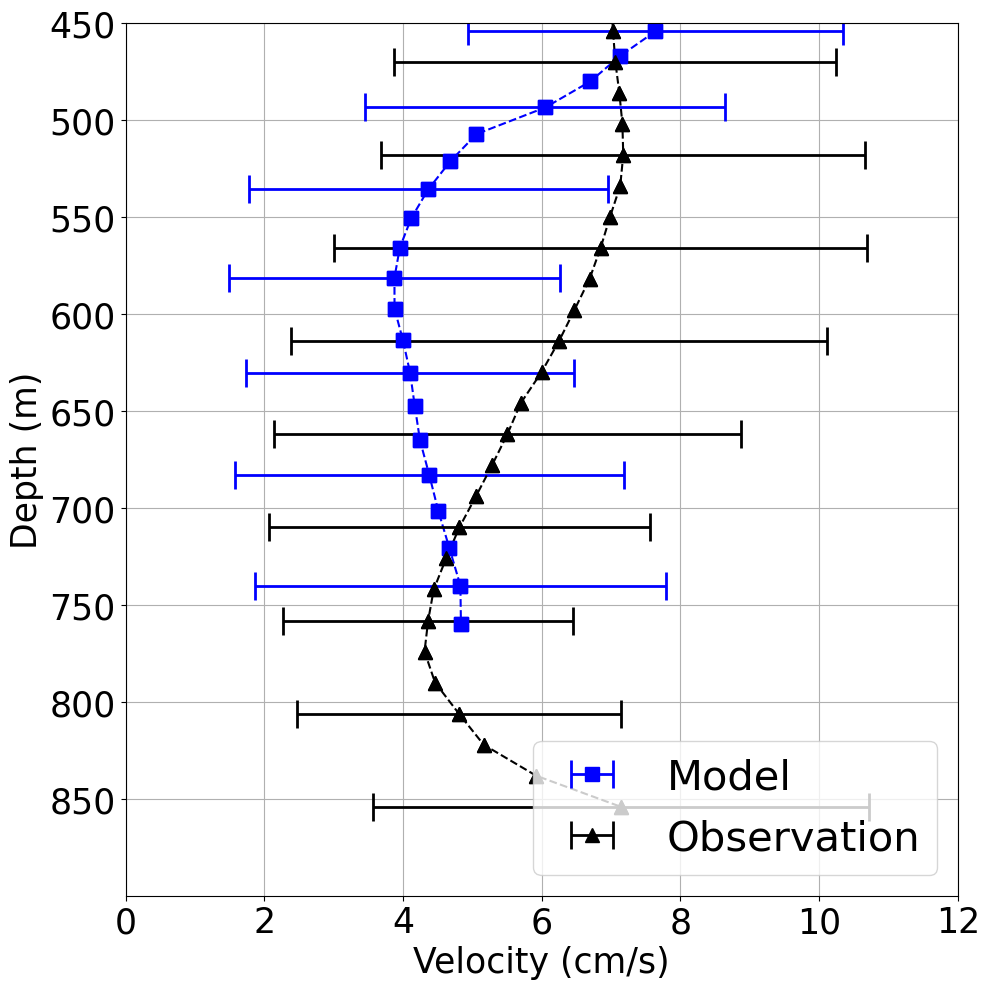

In [657]:
fig, ax = plt.subplots(figsize=(10,10)) 


ax.plot(np.asarray(SOhi_mean)*100, RC[89:114], '--s', c='blue', ms=10)

ax.errorbar(np.asarray(SOhi_mean)*100, RC[89:114], xerr=np.asarray(SOhi_std)*100, capsize=10, ls='none', marker='s', ms=10, 
            lw=2, capthick=2, errorevery=3, c='b', label='Model')

#ax.plot(np.asarray(SOhi_mean)*100, RC[89:114],'-s', c='b')


ax.plot(Obs_mean, -depths[:28], '--^', c='k', ms=10)
ax.errorbar(Obs_mean, -depths[:28], xerr=Obs_std, capsize=10, marker='^', ms=10, 
            ls='none',lw=2, capthick=2, errorevery=3, c='k', label='Observation')
# ax.plot(Obs_mean, -depths[:28],'-^', c='k')

ax.set_yticks([-400, -450, -500, -550, -600, -650, -700, -750, -800, -850])
ax.set_yticklabels([400, 450, 500, 550, 600, 650, 700, 750, 800, 850])
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.grid()

ax.set_ylabel('Depth (m)', fontsize=25)
ax.set_xlabel('Velocity (cm/s)', fontsize=25)
ax.tick_params(axis='both', labelsize=25)

ax.legend(fontsize=30, loc='lower right')
ax.set_ylim(-900, -450)
ax.set_xlim(0,12)

plt.tight_layout()

plt.savefig('img/MooringB_Final_max.jpg', dpi=300)

### Plot 2: Mooring A-D

In [703]:
lons = [-106.53533, -104.96868, -102.10417, -102.15437]
lats = [-73.81265, -74.36168, -74.86330, -75.05528]
depths = [-732, -630.18085, -646, -696.15]

resmaxmean = []
resmaxstd = []
resmeanmean = []
resmeanstd = []
for c in range(len(lons)):
    iy = np.argmin(abs(lats[c] - YC))
    ix = np.argmin(abs(lons[c] - XC))
    iz = np.argmin(abs(depths[c] - RC))

    nt = int(len(cube['date'])/4)
    
    count = 0
    tempmax = []
    tempmean = []
    for t in tqdm(range(0,nt*4,4)):
        u = np.asarray(cube['UVEL'][t:t+4, iz, iy-1:iy+2, ix-1:ix+2])
        v = np.asarray(cube['VVEL'][t:t+4, iz, iy-1:iy+2, ix-1:ix+2])
        speed = np.sqrt(u**2 + v**2)
        tempmax.append(np.nanmax(speed))
        tempmean.append(np.nanmean(speed))

    resmaxmean.append(np.nanmean(tempmax))
    resmaxstd.append(np.nanstd(tempmax))
    resmeanmean.append(np.nanmean(tempmean))
    resmeanstd.append(np.nanstd(tempmean))

100%|█████████████████████████████████████████| 365/365 [01:45<00:00,  3.48it/s]


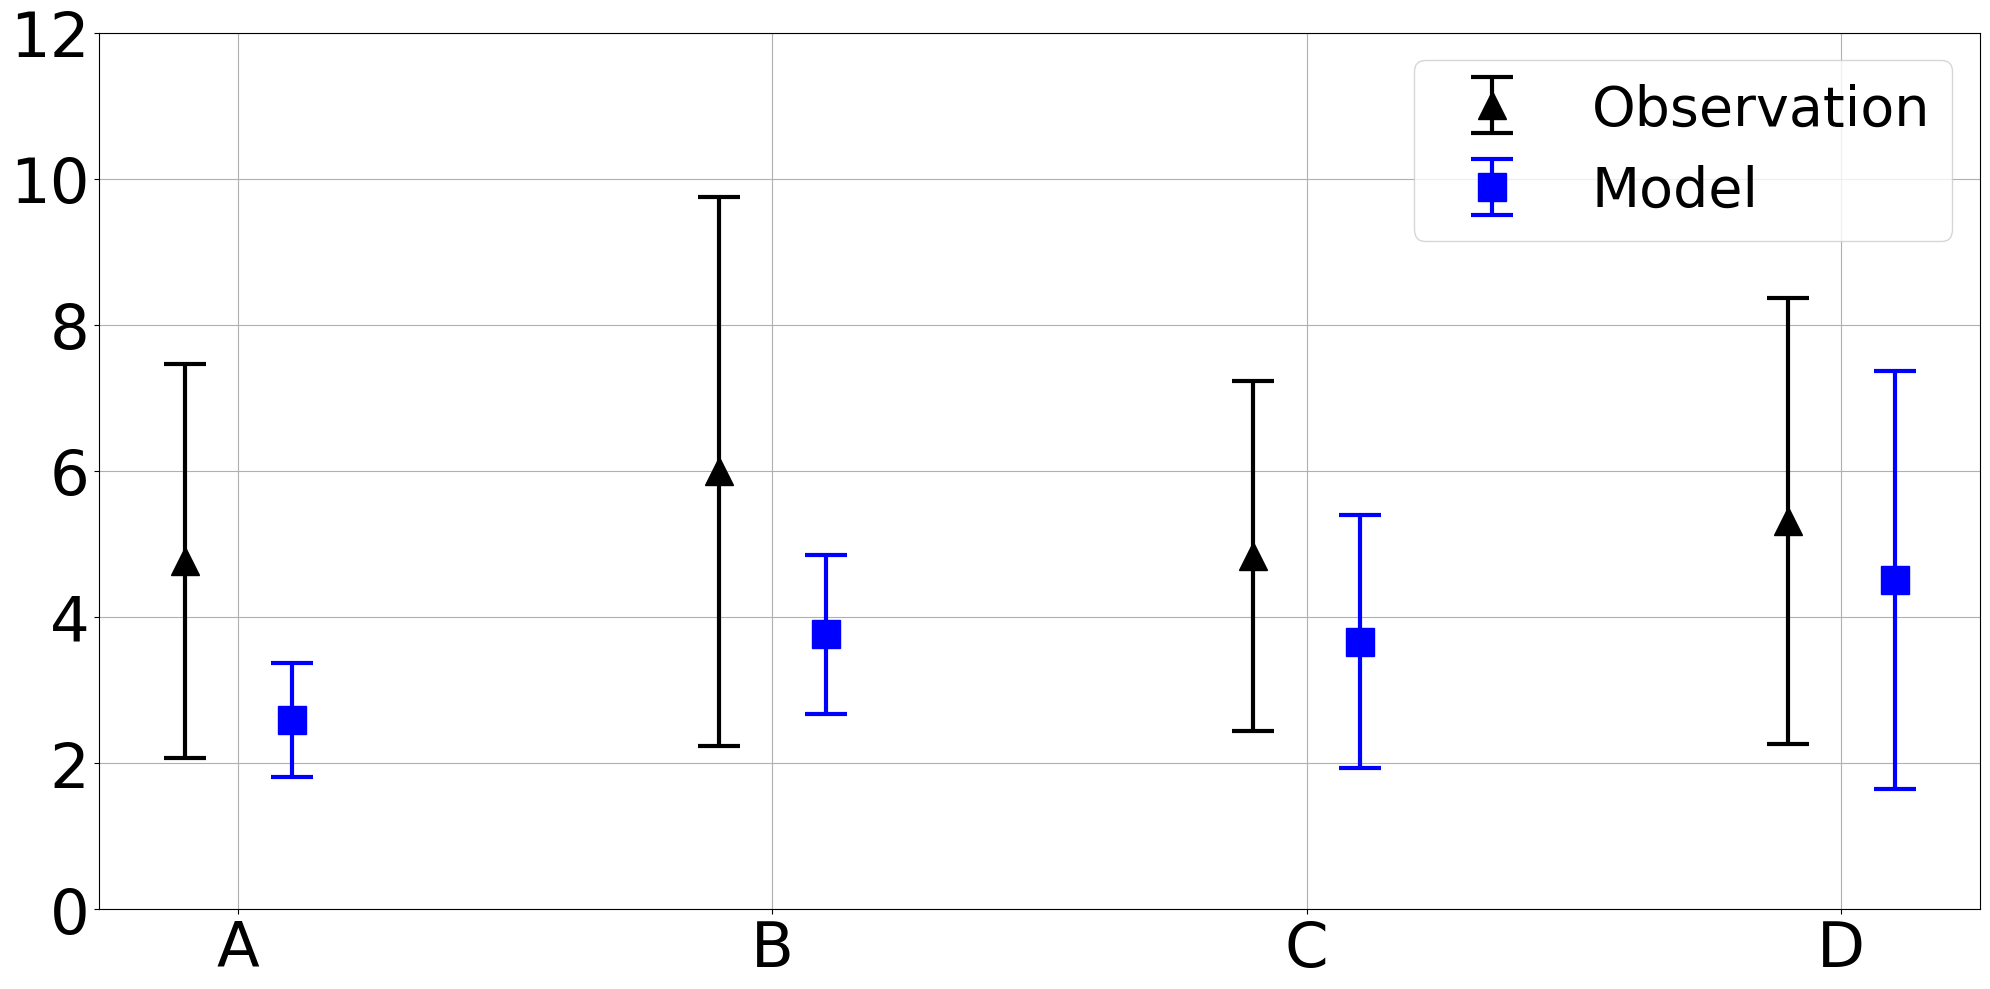

In [706]:
fig, ax = plt.subplots(figsize=(20,10))
ax.errorbar([1,1.5, 2, 2.5], 
            [np.mean(v3), Obs_mean[13], np.mean(v2), np.mean(v1)], 
            yerr=[np.std(v3), Obs_std[13], np.std(v2), np.std(v1)], 
            ls='none', marker='^', ms=20, lw=3, capthick=3, capsize=15, c='k', label='Observation')

SOhi_mean[13]

ax.errorbar([1.1, 1.6, 2.1, 2.6], 
            np.asarray(resmeanmean) * 100, 
            yerr=np.asarray(resmeanstd)*100, 
            ls='none', marker='s', ms=20, lw=3, capthick=3, capsize=15, c='blue', label='Model')

ax.set_ylim(0, 12)
ax.grid()

ax.set_xticks([1.05, 1.55, 2.05, 2.55])
ax.set_xticklabels(['A', 'B', 'C', 'D'])
ax.tick_params(axis='both', labelsize=45)

ax.legend(fontsize=40)

plt.tight_layout()

plt.savefig('img/All_R1mean.png', dpi=300)

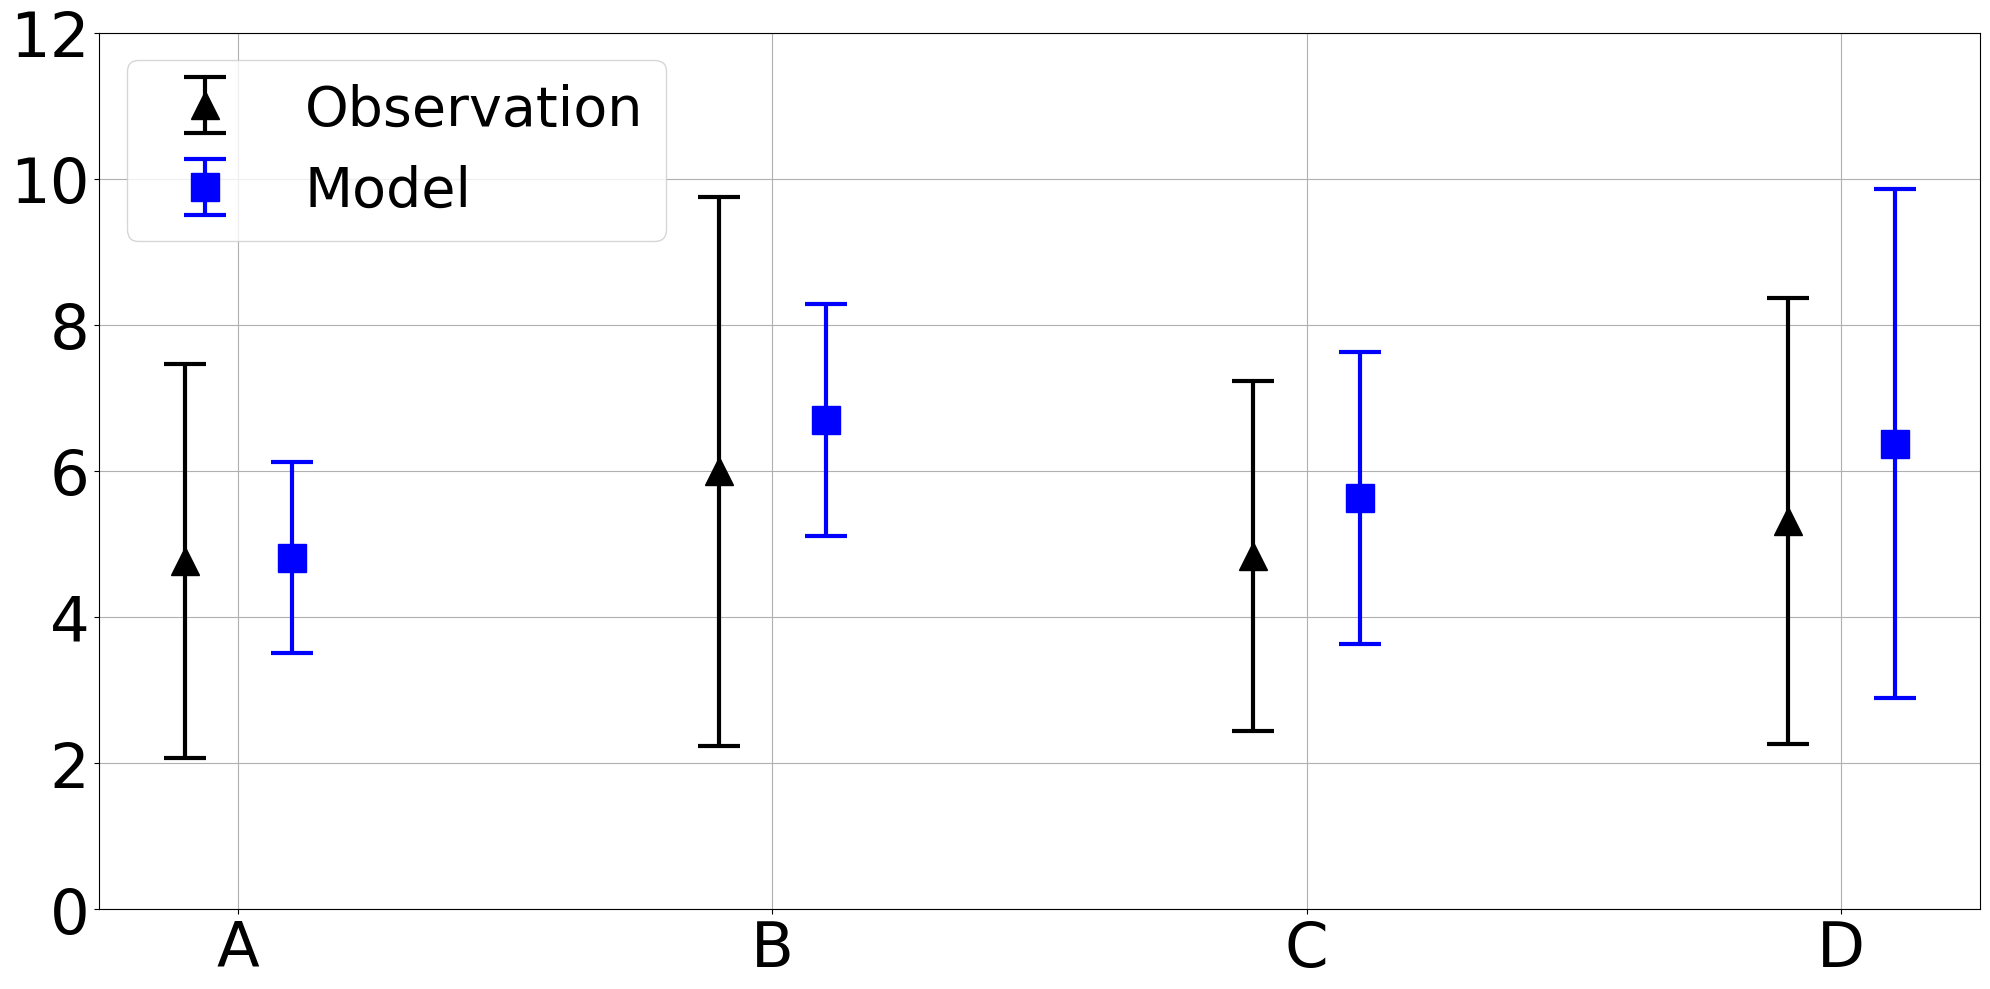

In [707]:
fig, ax = plt.subplots(figsize=(20,10))
ax.errorbar([1,1.5, 2, 2.5], 
            [np.mean(v3), Obs_mean[13], np.mean(v2), np.mean(v1)], 
            yerr=[np.std(v3), Obs_std[13], np.std(v2), np.std(v1)], 
            ls='none', marker='^', ms=20, lw=3, capthick=3, capsize=15, c='k', label='Observation')

SOhi_mean[13]

ax.errorbar([1.1, 1.6, 2.1, 2.6], 
            np.asarray(resmaxmean) * 100, 
            yerr=np.asarray(resmaxstd)*100, 
            ls='none', marker='s', ms=20, lw=3, capthick=3, capsize=15, c='blue', label='Model')

ax.set_ylim(0, 12)
ax.grid()

ax.set_xticks([1.05, 1.55, 2.05, 2.55])
ax.set_xticklabels(['A', 'B', 'C', 'D'])
ax.tick_params(axis='both', labelsize=45)

ax.legend(fontsize=40)

plt.tight_layout()

plt.savefig('img/All_R1max.png', dpi=300)